In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import joblib

In [27]:
data = pd.read_csv('survey.csv')

print(data.shape)
data.head()


(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [28]:
#Data Cleaning

# Check for missing values
data.isnull().sum()

# Drop columns with too many missing or irrelevant info
data.drop(columns=['comments', 'state', 'Timestamp'], inplace=True)

# Drop rows with missing values for simplicity
data.dropna(inplace=True)


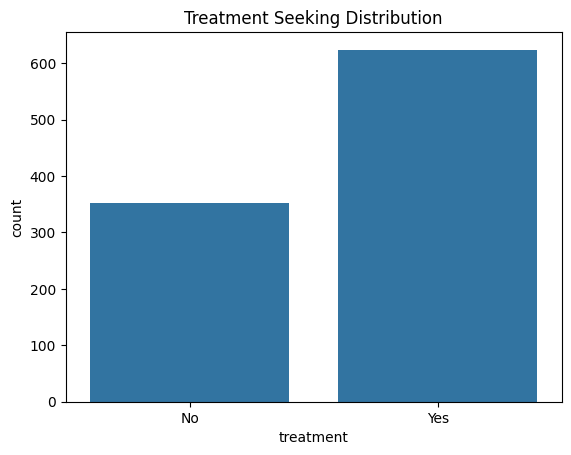

In [11]:
#EDA (Exploratory Data Analysis)

#Treatment distribution
sns.countplot(data=data,x='treatment')
plt.title("Treatment Seeking Distribution")

#Age range sanity check
data = data[(data['Age']>10)&(data["Age"]<100)]

In [29]:
# Encode categorical columns
categorical_cols = data.select_dtypes(include='object').columns
le_dict = {}

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    le_dict[col]=le

# Confirm everything is numeric
data.dtypes


Age                          int64
Gender                       int32
Country                      int32
self_employed                int32
family_history               int32
treatment                    int32
work_interfere               int32
no_employees                 int32
remote_work                  int32
tech_company                 int32
benefits                     int32
care_options                 int32
wellness_program             int32
seek_help                    int32
anonymity                    int32
leave                        int32
mental_health_consequence    int32
phys_health_consequence      int32
coworkers                    int32
supervisor                   int32
mental_health_interview      int32
phys_health_interview        int32
mental_vs_physical           int32
obs_consequence              int32
dtype: object

In [30]:
X = data.drop('treatment', axis=1)
y = data['treatment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build a pipeline that does scaling and classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [31]:
# Evaluate model
y_pred = pipeline.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.826530612244898

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.62      0.71        68
           1       0.82      0.94      0.88       128

    accuracy                           0.83       196
   macro avg       0.83      0.78      0.79       196
weighted avg       0.83      0.83      0.82       196



In [32]:
# Save the full pipeline
joblib.dump(pipeline, 'mental_health_model.pkl')

# (Optional) Save label encoders if you want to decode results in Flask
joblib.dump(le_dict, 'label_encoders.pkl')

['label_encoders.pkl']